# Exercise: Derivatives


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['figure.dpi']= 150

### Load data

In [2]:
data = np.loadtxt("data.dat")

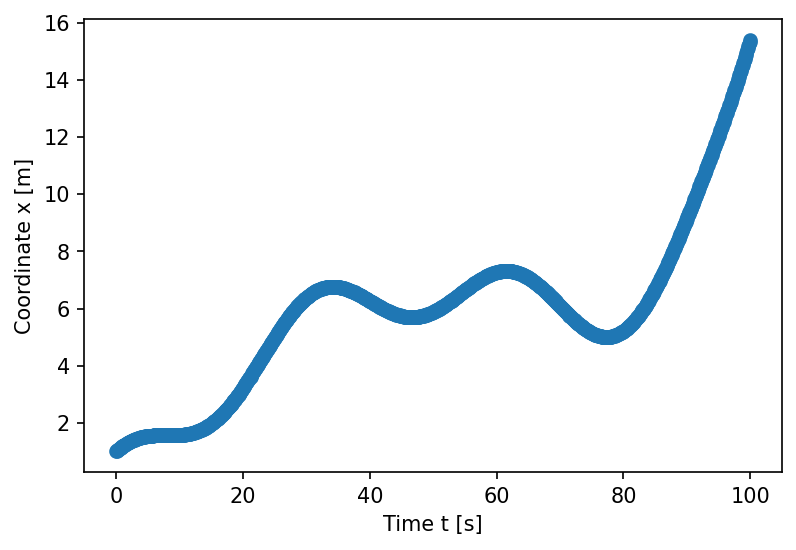

In [3]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity $v(t)=\dot{x}(t)$ and the acceleration $a(t)=\ddot{x}(t)$ for the loaded data set that describes a set of points $(t_i,x_i)$ for $i=0,\dots,1000$.

1. Calculate $v_i$ and $a_i$ using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function $x(t)$ but only its values for specific points. You have to define the functions for the derivatives a bit differently.

### Solution

In [4]:
def forward(data):
    
    derive = np.zeros(len(data))
    
    derive[:-1] = (data[1:,1] - data[:-1,1]) /(data[1:,0] - data[:-1,0])
    derive[-1] = (data[-1,1] - data[-2,1]) / (data[-1,0] - data[-2,0])
    
    return np.array([data[:,0],derive])

In [5]:
velocity_f = forward(data)
acceleration_f = forward(forward(data))

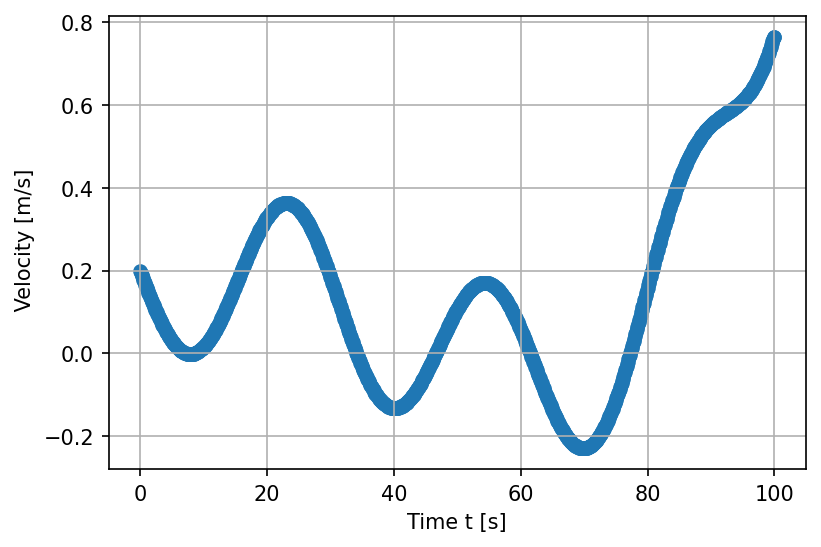

In [6]:
plt.xlabel('Time t [s]')
plt.ylabel(' Velocity [m/s]')
plt.scatter(velocity_f[0],velocity_f[1])
plt.grid()

In [7]:
def central(data):
    
    derive = np.zeros(len(data))
    derive[1:-1] = (data[2:,1] - data[:-2,1]) /(data[2:,0] - data[:-2,0])
    
    derive[0] = (data[1,1] - data[0,1]) /(data[1,0] - data[0,0]) 
    derive[-1] = (data[-1,1] - data[-2,1]) /(data[-1,0] - data[-2,0])
    
    return np.transpose(np.array([data[:,0],derive]))

In [8]:
velocity_c = central(data)
acceleration_c = central(central(velocity_c))

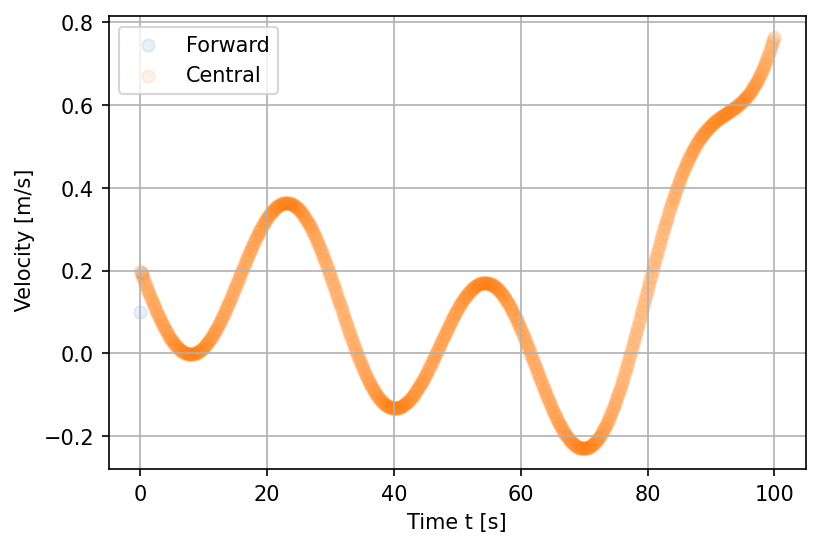

In [9]:
plt.xlabel('Time t [s]')
plt.ylabel(' Velocity [m/s]')
plt.scatter(velocity_f[:,0],velocity_f[:,1],alpha=0.1,label="Forward")
plt.scatter(velocity_c[:,0],velocity_c[:,1],alpha=0.1,label="Central")
plt.legend()
plt.grid()

### Richardson: $f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)$

In [25]:
def Richardson(data):
    
    derive = np.zeros(len(data))
    
    derive[2:-2] = (-data[4:,1] +8*data[3:-1 ,1] - 8*data[1:-3,1] + data[:-4,1])/12*(data[3:-1,0] - data[2:-2,0]) 
    
    derive[0]  = (data[1,1] - data[0,1])/(data[1,0]-data[0,0]) 
    derive[1] = (data[2,1] - data[0,1])/(data[2,0]-data[0,0])
    
    derive[-1] = (data[-1,1] - data[-2,1])/(data[-1,0]-data[-2,0])
    derive[-2] = (data[-1,1] - data[-3,1])/(data[-1,0]-data[-3,0])
    
    return np.transpose(np.array([data[:,0],derive]))

In [26]:
velocity_c = Richardson(data)
acceleration_c = Richardson(Richardson(velocity_c))